# **Import Library**
Import libraries we are going to use in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Import Dataset**
These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.

For each dataset, the fields are:

* A row number (1-n) useful in sorting this export's results
* The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results
* The date in yyyy-mm-dd format
* The local time of day in hh:mm:ss 24-hour format
* The numeric data, if any (may be an empty string)
* The text data, if any (may be an empty string)

The units of each dataset are:

* Solar radiation: watts per meter^2

* Temperature: degrees Fahrenheit

* Humidity: percent

* Barometric pressure: Hg

* Wind direction: degrees

* Wind speed: miles per hour

* Sunrise/sunset: Hawaii time

In [2]:
## import the dataset
df = pd.read_csv('SolarPrediction.csv')
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [3]:
## check duplicate rows
duplicate = df[df.duplicated()]
print('The number of duplicate rows in the dataset: ' + str(len(duplicate)))

The number of duplicate rows in the dataset: 0


Text(0, 0.5, 'Radiation')

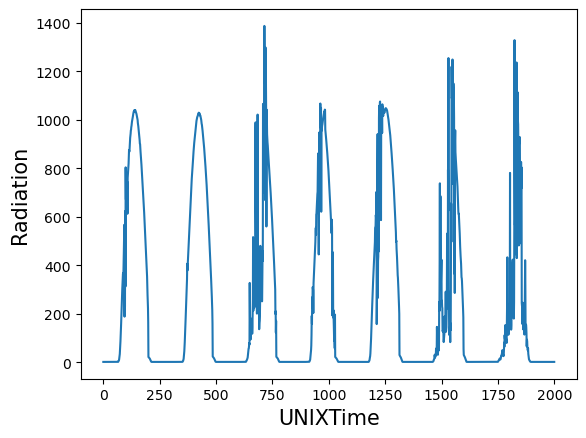

In [4]:
## plot the radiation
plt.plot(df['Radiation'].iloc[:2000], )
plt.xlabel('UNIXTime',size=15)
plt.ylabel('Radiation',size=15)

# **Data Processing**
* Sort the dataframe by **UNIXTime** and reset the index
* Create new columns **SecondsAfterSunRise** and **SecondsAfterSunSet**
* Drop the columns **UNIXTime**, **Data**, **Time**, **TimeSunRise** and **TimeSunSet**

In [5]:
## Sort the dataframe by UNIXTime and reset the index
df = df.sort_values(['UNIXTime'])
df = df.reset_index(drop=True)

## Create new columns SecondsAfterSunRise and SecondsAfterSunSet
df['Time'] = pd.to_datetime(df['Time'])
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'])
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'])
df['SecondsAfterSunRise'] = df['Time'] - df['TimeSunRise']
df['SecondsAfterSunRise'] = df['SecondsAfterSunRise'].apply(lambda x: x.total_seconds())
df['SecondsAfterSunRise'] = df['SecondsAfterSunRise'].astype('int64')
df['SecondsAfterSunSet'] = df['Time'] - df['TimeSunSet']
df['SecondsAfterSunSet'] = df['SecondsAfterSunSet'].apply(lambda x: x.total_seconds())
df['SecondsAfterSunSet'] = df['SecondsAfterSunSet'].astype('int64')

## Drop the columns which will not be used
df = df.drop(columns=['UNIXTime','Data', 'Time', 'TimeSunRise', 'TimeSunSet'])

df

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SecondsAfterSunRise,SecondsAfterSunSet
0,2.58,51,30.43,103,77.27,11.25,-22012,-67072
1,2.83,51,30.43,103,153.44,9.00,-21710,-66770
2,2.16,51,30.43,103,142.04,7.87,-20814,-65874
3,2.21,51,30.43,103,144.12,18.00,-20515,-65575
4,2.25,51,30.43,103,67.42,11.25,-20211,-65271
...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,238.94,6.75,59882,20462
32682,1.21,41,30.34,82,236.79,5.62,60181,20761
32683,1.21,42,30.34,81,218.28,7.87,60484,21064
32684,1.19,41,30.34,80,215.23,7.87,60783,21363


In [6]:
df.dtypes

Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
SecondsAfterSunRise         int64
SecondsAfterSunSet          int64
dtype: object

* Split train/test datasets

In [7]:
## Split train/test datasets and save them
training_size = round(len(df) * 0.80)
train_df = df[:training_size]
test_df  = df[training_size:]

train_df.to_csv('train_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)